In [1]:
import numpy as np
import matplotlib.pyplot as plt
from phoebe.dependencies import distl
import phoebe
import ellc
from astropy import units as u
from astropy import constants as c
phoebe.interactive_checks_off()
phoebe.interactive_constraints_off()
%matplotlib inline

In [2]:
lc_res = {
    'period@binary': phoebe.gaussian(51.418877, 2.6e-5),
    'requivsumfrac': phoebe.gaussian(0.070419, 0.0001),
    'requivratio': phoebe.gaussian(0.4659, 0.0031),
    'incl@binary': phoebe.gaussian(86.3632, 0.008),
    'sma@primary': phoebe.gaussian(44.521,0.07),
    'ld_coeffs[0]@primary': phoebe.gaussian(0.072,0.081),
    'ld_coeffs[1]@primary': phoebe.gaussian(0.487,0.12),
    'ld_coeffs[0]@secondary': phoebe.gaussian(0.365,0.126),
    'ld_coeffs[1]@secondary': phoebe.gaussian(0.121,0.194),
    'vgamma': phoebe.gaussian(-11.7,0.022),
    'teff@primary': phoebe.gaussian(9809,100),
    'logg@primary': phoebe.gaussian(3.63,0.20),
    'teffratio': phoebe.gaussian(1.051,0.009),
    'syncpar@primary': phoebe.gaussian(6.35,0.6),
    'syncpar@secondary': phoebe.gaussian(17.7,8),
    'q@binary': phoebe.gaussian(0.6653,0.007),
    'esinw': phoebe.gaussian(0.15586, 0.001),
    'ecosw': phoebe.gaussian(0.395055, 6.5e-5),
    'pblum@primary': phoebe.gaussian(10.216,0.032),
    'sigmas_lnf@lc01': phoebe.gaussian(-8.445, 0.016),
    'sigmas_lnf@primary@rv01': phoebe.gaussian(-4.89, 0.15),
}

In [3]:
times = np.linspace(0,52,200)

In [4]:
b = phoebe.default_binary()
b.add_dataset('lc', times=times, passband='TESS:T')
b.add_compute('ellc')
b.set_value_all('ld_mode', value='manual')
b.set_value_all('ld_func', value='square_root')
b.set_value_all('distortion_method', compute='ellc01', value='sphere')
b.set_value_all('rv_method', compute='ellc01', value='flux-weighted')
# b.set_value_all('irrad_method', compute='ellc01', value='none')

b.add_constraint('requivsumfrac')
b.add_constraint('requivratio')
b.add_constraint('teffratio')

b.flip_constraint('requivsumfrac', solve_for='requiv@primary')
b.flip_constraint('requivratio', solve_for='requiv@secondary')
b.flip_constraint('teffratio', solve_for='teff@secondary')

b.flip_constraint('esinw', solve_for='ecc')
b.flip_constraint('ecosw', solve_for='per0')

b.flip_constraint('sma@primary', solve_for='sma@binary')

b.set_value_all('gravb_bol', 1.0)
b.set_value_all('irrad_frac_refl_bol', 1.0)

In [5]:
ph_params = ['period@binary', 'requivsumfrac', 'requivratio', 
             'incl@binary', 'esinw', 'ecosw', 'teff@primary', 'teffratio', 'q@binary',
             'sma@primary', 'vgamma', 'syncpar@primary', 'syncpar@secondary', 'pblum@primary',
            ]
for twig in ph_params:
    b.set_value(twig, lc_res[twig].loc)
    
b.set_value_all('ld_coeffs@primary', [0.072,0.487])
b.set_value_all('ld_coeffs@secondary', [0.365,0.121])

### phoebe - ellc backend

no irradiation

In [6]:
b.set_value_all('distortion_method', compute='ellc01', value='sphere')
b.set_value_all('irrad_method', compute='ellc01', value='none')
b.run_checks()
b.run_delayed_constraints()
b.run_compute('ellc01', model='ellc_sphere_noirrad', overwrite=True)

100%|██████████| 1/1 [00:00<00:00, 46.28it/s]

ELLC KWARGS: {'t_obs': array([ 0.        ,  0.26130653,  0.52261307,  0.7839196 ,  1.04522613,
        1.30653266,  1.5678392 ,  1.82914573,  2.09045226,  2.35175879,
        2.61306533,  2.87437186,  3.13567839,  3.39698492,  3.65829146,
        3.91959799,  4.18090452,  4.44221106,  4.70351759,  4.96482412,
        5.22613065,  5.48743719,  5.74874372,  6.01005025,  6.27135678,
        6.53266332,  6.79396985,  7.05527638,  7.31658291,  7.57788945,
        7.83919598,  8.10050251,  8.36180905,  8.62311558,  8.88442211,
        9.14572864,  9.40703518,  9.66834171,  9.92964824, 10.19095477,
       10.45226131, 10.71356784, 10.97487437, 11.2361809 , 11.49748744,
       11.75879397, 12.0201005 , 12.28140704, 12.54271357, 12.8040201 ,
       13.06532663, 13.32663317, 13.5879397 , 13.84924623, 14.11055276,
       14.3718593 , 14.63316583, 14.89447236, 15.15577889, 15.41708543,
       15.67839196, 15.93969849, 16.20100503, 16.46231156, 16.72361809,
       16.98492462, 17.24623116, 17.50753

<ParameterSet: 3 parameters | qualifiers: times, comments, fluxes>

In [7]:
lc_kwargs = {'t_obs': np.array([ 0.        ,  0.26130653,  0.52261307,  0.7839196 ,  1.04522613,
        1.30653266,  1.5678392 ,  1.82914573,  2.09045226,  2.35175879,
        2.61306533,  2.87437186,  3.13567839,  3.39698492,  3.65829146,
        3.91959799,  4.18090452,  4.44221106,  4.70351759,  4.96482412,
        5.22613065,  5.48743719,  5.74874372,  6.01005025,  6.27135678,
        6.53266332,  6.79396985,  7.05527638,  7.31658291,  7.57788945,
        7.83919598,  8.10050251,  8.36180905,  8.62311558,  8.88442211,
        9.14572864,  9.40703518,  9.66834171,  9.92964824, 10.19095477,
       10.45226131, 10.71356784, 10.97487437, 11.2361809 , 11.49748744,
       11.75879397, 12.0201005 , 12.28140704, 12.54271357, 12.8040201 ,
       13.06532663, 13.32663317, 13.5879397 , 13.84924623, 14.11055276,
       14.3718593 , 14.63316583, 14.89447236, 15.15577889, 15.41708543,
       15.67839196, 15.93969849, 16.20100503, 16.46231156, 16.72361809,
       16.98492462, 17.24623116, 17.50753769, 17.76884422, 18.03015075,
       18.29145729, 18.55276382, 18.81407035, 19.07537688, 19.33668342,
       19.59798995, 19.85929648, 20.12060302, 20.38190955, 20.64321608,
       20.90452261, 21.16582915, 21.42713568, 21.68844221, 21.94974874,
       22.21105528, 22.47236181, 22.73366834, 22.99497487, 23.25628141,
       23.51758794, 23.77889447, 24.04020101, 24.30150754, 24.56281407,
       24.8241206 , 25.08542714, 25.34673367, 25.6080402 , 25.86934673,
       26.13065327, 26.3919598 , 26.65326633, 26.91457286, 27.1758794 ,
       27.43718593, 27.69849246, 27.95979899, 28.22110553, 28.48241206,
       28.74371859, 29.00502513, 29.26633166, 29.52763819, 29.78894472,
       30.05025126, 30.31155779, 30.57286432, 30.83417085, 31.09547739,
       31.35678392, 31.61809045, 31.87939698, 32.14070352, 32.40201005,
       32.66331658, 32.92462312, 33.18592965, 33.44723618, 33.70854271,
       33.96984925, 34.23115578, 34.49246231, 34.75376884, 35.01507538,
       35.27638191, 35.53768844, 35.79899497, 36.06030151, 36.32160804,
       36.58291457, 36.84422111, 37.10552764, 37.36683417, 37.6281407 ,
       37.88944724, 38.15075377, 38.4120603 , 38.67336683, 38.93467337,
       39.1959799 , 39.45728643, 39.71859296, 39.9798995 , 40.24120603,
       40.50251256, 40.7638191 , 41.02512563, 41.28643216, 41.54773869,
       41.80904523, 42.07035176, 42.33165829, 42.59296482, 42.85427136,
       43.11557789, 43.37688442, 43.63819095, 43.89949749, 44.16080402,
       44.42211055, 44.68341709, 44.94472362, 45.20603015, 45.46733668,
       45.72864322, 45.98994975, 46.25125628, 46.51256281, 46.77386935,
       47.03517588, 47.29648241, 47.55778894, 47.81909548, 48.08040201,
       48.34170854, 48.60301508, 48.86432161, 49.12562814, 49.38693467,
       49.64824121, 49.90954774, 50.17085427, 50.4321608 , 50.69346734,
       50.95477387, 51.2160804 , 51.47738693, 51.73869347, 52.        ]), 
             'radius_1': 0.048038065352343264, 
             'radius_2': 0.02238093464765673, 
             'sbratio': 1.05745983006238, 
             'incl': 86.3632, 
             'light_3': 0.0, 
             't_zero': 0.0, 
             'period': 51.418877, 
             'a': 111.43968330076657, 
             'q': 0.6653, 
             'f_c': 0.6062085103679928, 
             'f_s': 0.2391658336838044, 
             'ld_1': 'sqrt', 
             'ld_2': 'sqrt', 
             'ldc_1': np.array([0.072, 0.487]), 
             'ldc_2': np.array([0.365, 0.121]), 
             'gdc_1': 1.0, 'gdc_2': 1.0, 
             'didt': 0.0, 'domdt': 0.0, 
             'rotfac_1': 6.35, 'rotfac_2': 17.7, 
             'hf_1': None, 'hf_2': None, 
             'bfac_1': None, 'bfac_2': None, 
             'heat_1': None, 'heat_2': None, 
             'lambda_1': None, 'lambda_2': None, 
             'vsini_1': None, 'vsini_2': None, 
             't_exp': 0.0, 'n_int': 1, 
             'grid_1': 'default', 'grid_2': 'default', 
             'shape_1': 'sphere', 'shape_2': 'sphere', 
             'spots_1': None, 'spots_2': None, 'exact_grav': False, 'verbose': 1}

pureellc_sphere_noirrad = ellc.lc(**lc_kwargs)

with irradiation

In [8]:
b.set_value_all('distortion_method', compute='ellc01', value='sphere')
b.set_value_all('irrad_method', compute='ellc01', value='lambert')
b.run_checks()
b.run_delayed_constraints()
b.run_compute('ellc01', model='ellc_sphere_irrad', overwrite=True)

100%|██████████| 1/1 [00:00<00:00, 54.75it/s]

ELLC KWARGS: {'t_obs': array([ 0.        ,  0.26130653,  0.52261307,  0.7839196 ,  1.04522613,
        1.30653266,  1.5678392 ,  1.82914573,  2.09045226,  2.35175879,
        2.61306533,  2.87437186,  3.13567839,  3.39698492,  3.65829146,
        3.91959799,  4.18090452,  4.44221106,  4.70351759,  4.96482412,
        5.22613065,  5.48743719,  5.74874372,  6.01005025,  6.27135678,
        6.53266332,  6.79396985,  7.05527638,  7.31658291,  7.57788945,
        7.83919598,  8.10050251,  8.36180905,  8.62311558,  8.88442211,
        9.14572864,  9.40703518,  9.66834171,  9.92964824, 10.19095477,
       10.45226131, 10.71356784, 10.97487437, 11.2361809 , 11.49748744,
       11.75879397, 12.0201005 , 12.28140704, 12.54271357, 12.8040201 ,
       13.06532663, 13.32663317, 13.5879397 , 13.84924623, 14.11055276,
       14.3718593 , 14.63316583, 14.89447236, 15.15577889, 15.41708543,
       15.67839196, 15.93969849, 16.20100503, 16.46231156, 16.72361809,
       16.98492462, 17.24623116, 17.50753

<ParameterSet: 3 parameters | qualifiers: times, comments, fluxes>

In [9]:
lc_kwargs = {'t_obs': np.array([ 0.        ,  0.26130653,  0.52261307,  0.7839196 ,  1.04522613,
        1.30653266,  1.5678392 ,  1.82914573,  2.09045226,  2.35175879,
        2.61306533,  2.87437186,  3.13567839,  3.39698492,  3.65829146,
        3.91959799,  4.18090452,  4.44221106,  4.70351759,  4.96482412,
        5.22613065,  5.48743719,  5.74874372,  6.01005025,  6.27135678,
        6.53266332,  6.79396985,  7.05527638,  7.31658291,  7.57788945,
        7.83919598,  8.10050251,  8.36180905,  8.62311558,  8.88442211,
        9.14572864,  9.40703518,  9.66834171,  9.92964824, 10.19095477,
       10.45226131, 10.71356784, 10.97487437, 11.2361809 , 11.49748744,
       11.75879397, 12.0201005 , 12.28140704, 12.54271357, 12.8040201 ,
       13.06532663, 13.32663317, 13.5879397 , 13.84924623, 14.11055276,
       14.3718593 , 14.63316583, 14.89447236, 15.15577889, 15.41708543,
       15.67839196, 15.93969849, 16.20100503, 16.46231156, 16.72361809,
       16.98492462, 17.24623116, 17.50753769, 17.76884422, 18.03015075,
       18.29145729, 18.55276382, 18.81407035, 19.07537688, 19.33668342,
       19.59798995, 19.85929648, 20.12060302, 20.38190955, 20.64321608,
       20.90452261, 21.16582915, 21.42713568, 21.68844221, 21.94974874,
       22.21105528, 22.47236181, 22.73366834, 22.99497487, 23.25628141,
       23.51758794, 23.77889447, 24.04020101, 24.30150754, 24.56281407,
       24.8241206 , 25.08542714, 25.34673367, 25.6080402 , 25.86934673,
       26.13065327, 26.3919598 , 26.65326633, 26.91457286, 27.1758794 ,
       27.43718593, 27.69849246, 27.95979899, 28.22110553, 28.48241206,
       28.74371859, 29.00502513, 29.26633166, 29.52763819, 29.78894472,
       30.05025126, 30.31155779, 30.57286432, 30.83417085, 31.09547739,
       31.35678392, 31.61809045, 31.87939698, 32.14070352, 32.40201005,
       32.66331658, 32.92462312, 33.18592965, 33.44723618, 33.70854271,
       33.96984925, 34.23115578, 34.49246231, 34.75376884, 35.01507538,
       35.27638191, 35.53768844, 35.79899497, 36.06030151, 36.32160804,
       36.58291457, 36.84422111, 37.10552764, 37.36683417, 37.6281407 ,
       37.88944724, 38.15075377, 38.4120603 , 38.67336683, 38.93467337,
       39.1959799 , 39.45728643, 39.71859296, 39.9798995 , 40.24120603,
       40.50251256, 40.7638191 , 41.02512563, 41.28643216, 41.54773869,
       41.80904523, 42.07035176, 42.33165829, 42.59296482, 42.85427136,
       43.11557789, 43.37688442, 43.63819095, 43.89949749, 44.16080402,
       44.42211055, 44.68341709, 44.94472362, 45.20603015, 45.46733668,
       45.72864322, 45.98994975, 46.25125628, 46.51256281, 46.77386935,
       47.03517588, 47.29648241, 47.55778894, 47.81909548, 48.08040201,
       48.34170854, 48.60301508, 48.86432161, 49.12562814, 49.38693467,
       49.64824121, 49.90954774, 50.17085427, 50.4321608 , 50.69346734,
       50.95477387, 51.2160804 , 51.47738693, 51.73869347, 52.        ]), 
             'radius_1': 0.048038065352343264, 
             'radius_2': 0.02238093464765673, 
             'sbratio': 1.05745983006238, 
             'incl': 86.3632, 
             'light_3': 0.0, 
             't_zero': 0.0, 
             'period': 51.418877, 
             'a': 111.43968330076657, 
             'q': 0.6653, 
             'f_c': 0.6062085103679928, 
             'f_s': 0.2391658336838044, 
             'ld_1': 'sqrt', 
             'ld_2': 'sqrt', 
             'ldc_1': np.array([0.072, 0.487]), 
             'ldc_2': np.array([0.365, 0.121]), 
             'gdc_1': 1.0, 'gdc_2': 1.0, 
             'didt': 0.0, 'domdt': 0.0, 
             'rotfac_1': 6.35, 'rotfac_2': 17.7, 
             'hf_1': None, 'hf_2': None, 
             'bfac_1': None, 'bfac_2': None, 
             'heat_1': 0.5, 'heat_2': 0.5, 
             'lambda_1': None, 'lambda_2': None, 
             'vsini_1': None, 'vsini_2': None, 
             't_exp': 0.0, 'n_int': 1, 
             'grid_1': 'default', 'grid_2': 'default', 
             'shape_1': 'sphere', 'shape_2': 'sphere', 
             'spots_1': None, 'spots_2': None, 'exact_grav': False, 'verbose': 1}

pureellc_sphere_irrad = ellc.lc(**lc_kwargs)

In [10]:
phases = b.to_phase(times)
s = np.argsort(phases)

ellc_sphere_noirrad = b.get_value('fluxes', model = 'ellc_sphere_noirrad')[s]
ellc_sphere_irrad = b.get_value('fluxes', model = 'ellc_sphere_irrad')[s]

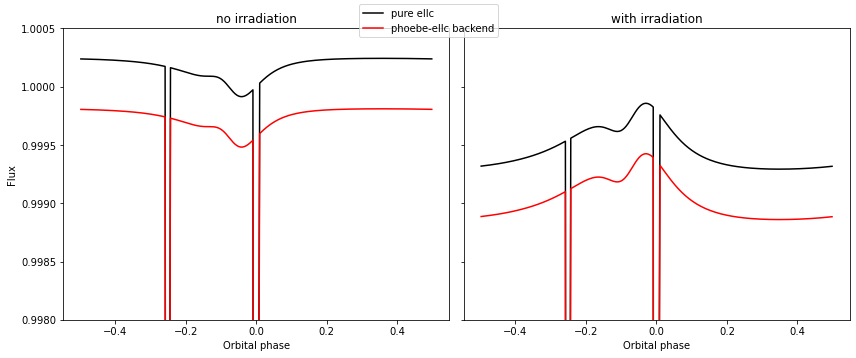

In [11]:
%matplotlib inline
fig, axes = plt.subplots(1, 2, figsize=(12,5))
axes[0].plot(phases[s], pureellc_sphere_noirrad[s], 'k-', label='pure ellc')
axes[0].plot(phases[s], ellc_sphere_noirrad, 'r-', label='phoebe-ellc backend')
axes[0].set_title('no irradiation')
axes[0].set_xlabel('Orbital phase')
axes[0].set_ylabel('Flux')
axes[0].set_ylim(0.998,1.0005)

axes[1].plot(phases[s], pureellc_sphere_irrad[s], 'k-')
axes[1].plot(phases[s], ellc_sphere_irrad, 'r-')
axes[1].set_title('with irradiation')
axes[1].set_xlabel('Orbital phase')
axes[1].set_yticklabels([])
axes[1].set_ylim(0.998,1.0005)

fig.tight_layout()
fig.legend(loc='upper center')
fig.patch.set_facecolor('white')
fig.savefig('ellc_phoebe_irradiation.png')

### comparison with phoebe backend

In [12]:
b.set_value_all('distortion_method', compute='phoebe01', value='sphere')
b.set_value_all('irrad_method', compute='phoebe01', value='none')
b.run_checks()
b.run_delayed_constraints()
b.run_compute('phoebe01', ntriangles=10000, model='phoebe_sphere_noirrad', overwrite=True)

b.set_value_all('irrad_method', compute='phoebe01', value='horvat')
b.run_checks()
b.run_delayed_constraints()
b.run_compute('phoebe01', ntriangles=10000, model='phoebe_sphere_irrad', overwrite=True)

100%|██████████| 200/200 [03:22<00:00,  1.01s/it]


<ParameterSet: 3 parameters | qualifiers: times, comments, fluxes>

In [13]:
phoebe_sphere_noirrad = b.get_value('fluxes', model = 'phoebe_sphere_noirrad')[s]
phoebe_sphere_irrad = b.get_value('fluxes', model = 'phoebe_sphere_irrad')[s]

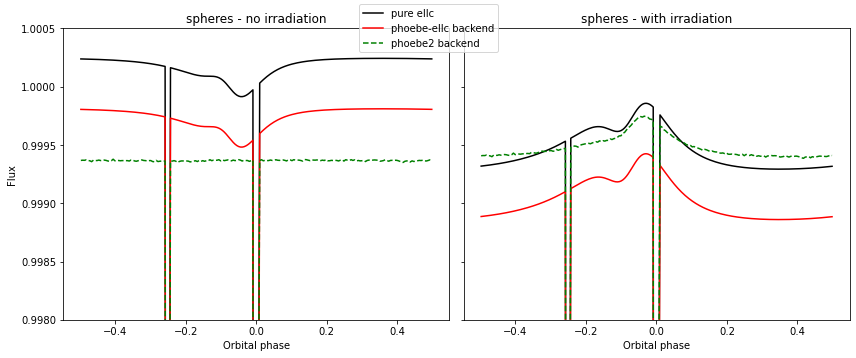

In [17]:
%matplotlib inline
fig, axes = plt.subplots(1, 2, figsize=(12,5))
axes[0].plot(phases[s], pureellc_sphere_noirrad[s], 'k-', label='pure ellc')
axes[0].plot(phases[s], ellc_sphere_noirrad, 'r-', label='phoebe-ellc backend')
axes[0].plot(phases[s], phoebe_sphere_noirrad, 'g--', label='phoebe2 backend')
axes[0].set_title('spheres - no irradiation')
axes[0].set_xlabel('Orbital phase')
axes[0].set_ylabel('Flux')
axes[0].set_ylim(0.998,1.0005)

axes[1].plot(phases[s], pureellc_sphere_irrad[s], 'k-')
axes[1].plot(phases[s], ellc_sphere_irrad, 'r-')
axes[1].plot(phases[s], phoebe_sphere_irrad, 'g--')
axes[1].set_title('spheres - with irradiation')
axes[1].set_xlabel('Orbital phase')
axes[1].set_yticklabels([])
axes[1].set_ylim(0.998,1.0005)

fig.tight_layout()
fig.legend(loc='upper center')
fig.patch.set_facecolor('white')
fig.savefig('ellc_phoebe_irradiation_sphere.png')